In [1]:
import numpy as np
import pandas as pd
import scipy.io
import math
from scipy.stats import t       #t-Verteitung
from scipy.stats import f       #f-Verteilung 
from scipy.stats import norm    #Standartnormalverteilung
from scipy.stats import chi2    #Chi-Quadrat-Verteilung 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

01: Scatterplott

Text(0, 0.5, 'Schwindung y /Promille')

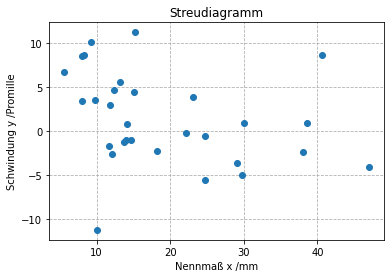

In [2]:
"""Matlab file laden"""
mat = scipy.io.whosmat('Gussteile.mat') #whosmat gibt eine Liste mit Variablen aus

"""Gewollte Daten aus dem Matlab file laden"""
data = scipy.io.loadmat('Gussteile.mat')['data']

"""Daten aufteilen"""
x = data[:,0]
y = data[:,1]

"""Streudiagramm"""
plt.plot(x, y,'o')
plt.grid(True, which= 'both', axis='both', linestyle='--')
plt.title('Streudiagramm')
plt.xlabel('Nennmaß x /mm')
plt.ylabel('Schwindung y /Promille')

02: Scatter-Matrix

array([[<AxesSubplot:xlabel='Körpergröße', ylabel='Körpergröße'>,
        <AxesSubplot:xlabel='Brustumfang', ylabel='Körpergröße'>,
        <AxesSubplot:xlabel='Lungenvolumen', ylabel='Körpergröße'>],
       [<AxesSubplot:xlabel='Körpergröße', ylabel='Brustumfang'>,
        <AxesSubplot:xlabel='Brustumfang', ylabel='Brustumfang'>,
        <AxesSubplot:xlabel='Lungenvolumen', ylabel='Brustumfang'>],
       [<AxesSubplot:xlabel='Körpergröße', ylabel='Lungenvolumen'>,
        <AxesSubplot:xlabel='Brustumfang', ylabel='Lungenvolumen'>,
        <AxesSubplot:xlabel='Lungenvolumen', ylabel='Lungenvolumen'>]],
      dtype=object)

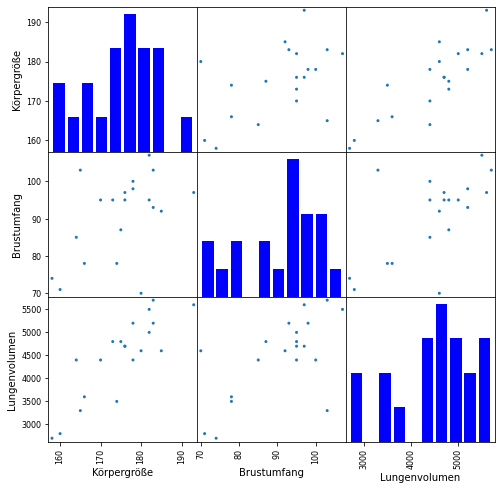

In [6]:
"""Matlab file laden"""
mat = scipy.io.whosmat('Sportuntersuchung.mat') #whosmat gibt eine Liste mit Variablen aus

"""Gewollte Daten aus dem Matlab file laden"""
data = scipy.io.loadmat('Sportuntersuchung.mat')['data']

"""Pandas Dataframe erstellen"""
df = pd.DataFrame(data, columns = ['Körpergröße', 'Brustumfang', 'Lungenvolumen'])

"""Scatter-Matrix plotten"""
pd.plotting.scatter_matrix(df,alpha=1,figsize=(8,8),diagonal='hist',hist_kwds={'rwidth':0.8, 'color':'b'})

03: Häufigkeitsverteilung

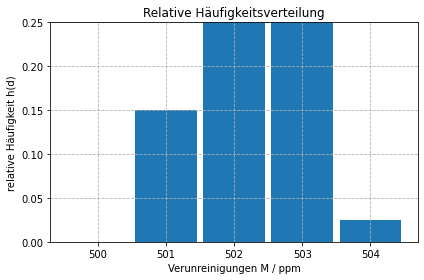

In [6]:
x = scipy.io.loadmat('Verunreinigungen.mat')['Verunreinigungen']
x = np.ravel(x)

a , b = np.histogram(x, bins = np.arange(np.floor(np.amin(x))-0.5, np.ceil(np.amax(x))+1.5))

"""Berechnung der absoluten und realtiven Häufigkeit"""
abs_cum_frequency = np.cumsum(a)
Rel_cum_frequency = np.cumsum(a/x.shape)
Classes = np.arange(np.floor(np.amin(x)),np.ceil(np.amax(x))+1).astype(int)

"""Plot"""
ax = plt.figure(1, figsize=(6, 4)).subplots(1, 1)
ax.hist(x, b , histtype='bar' , weights=np.ones(x.shape)/x.shape, rwidth=0.9)
ax.grid(True, which= 'both', axis='both', linestyle='--')
ax.set_xlabel('Verunreinigungen M / ppm')
ax.set_ylabel('relative Häufigkeit h(d)')
ax.set_ylim(top=0.25)
ax.set_title('Relative Häufigkeitsverteilung')
plt.tight_layout()

04: Relative Summenhaufigkeit

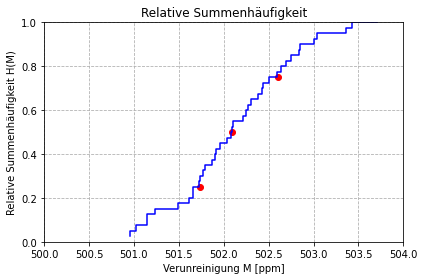

In [3]:
x = scipy.io.loadmat('Verunreinigungen.mat')['Verunreinigungen']
x = np.ravel(x)

N = len(x)
data_sort = np.sort(x)
Rel_cum_frequency = (1/N)*np.arange(1,N+1)


ax = plt.figure(1, figsize =(6, 4)).subplots(1, 1)
#ax.step(np.append([500,500.5, 500.95], data_sort) , np.append([0.0,0.0,0.0], Rel_cum_frequency), color='b', )
ax.step(data_sort ,  Rel_cum_frequency, color='b')
ax.grid(True, which= 'both', axis='both', linestyle='--')
ax.set_xlim(left=500, right=504)
ax.set_ylim(bottom=0.0, top=1)
ax.set_xlabel('Verunreinigung M [ppm]')
ax.set_ylabel('Relative Summenhäufigkeit H(M)')
ax.set_title('Relative Summenhäufigkeit')

quantiles = np.quantile(x,[0.25, 0.5, 0.75])

ax.scatter(quantiles, [0.25, 0.5, 0.75], color='r')
plt.tight_layout()

04: Zwei Polts

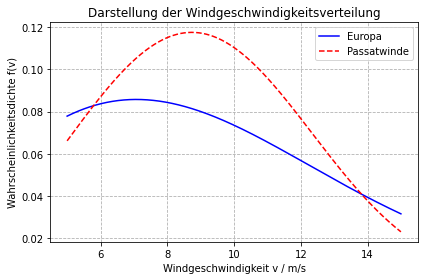

In [7]:
step = 0.01
v_w = np.arange(5,15+step, step)

def Ertrag(p_beta, p_eta, p_x):
    return (p_beta/p_eta) * (np.power((p_x/p_eta), (p_beta-1))) * (np.exp(-(np.power((p_x/p_eta),p_beta))))

EE = Ertrag(2,10,v_w)
EP = Ertrag(3,10,v_w)

"""Plot"""
ax = plt.figure(1, figsize=(6, 4)).subplots(1, 1)
ax.plot(v_w,EE, color='b')
ax.plot(v_w,EP, color='r',linestyle='--')
ax.grid(True, which= 'both', axis='both', linestyle='--')
ax.set_xlabel('Windgeschwindigkeit v / m/s')
ax.set_ylabel('Wahrscheinlichkeitsdichte f(v)')
ax.legend(('Europa', 'Passatwinde'))
ax.set_title('Darstellung der Windgeschwindigkeitsverteilung')
plt.tight_layout()

05: Wahrschenlichkeitsdichte

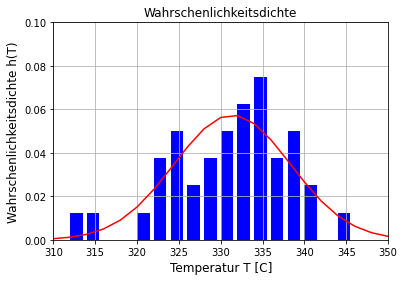

In [8]:
"""Gewollte Daten aus dem Matlab file laden"""
x = scipy.io.loadmat('Selbstentzuendung.mat')['Temp']
x = np.ravel(x)

"""Schrittweiten"""
dx = 2                          #Schrittweite anpassen
xh = np.arange(310,350+dx,dx)   #Grenzen anpassen!

N = len(x)
x_q = np.mean(x)
s = np.std(x, ddof=1)

"""Histogram mit zusätzlicher Wahrschneinlichkeitsdichte"""
fig = plt.figure(figsize=(6, 4))

plt.hist(x,xh, weights=(x/x)/(dx*N),width=1.5, color='b')   #Histogramm
plt.plot(xh, norm.pdf(xh, x_q, s), color='r')               #Wahrschenlichkeitsdichte

plt.title("Wahrschenlichkeitsdichte",fontsize=12)
plt.xlabel("Temperatur T [C]",fontsize=12)
plt.ylabel("Wahrschenlichkeitsdichte h(T)",fontsize=12)
plt.grid()
plt.ylim(top=0.1)
plt.xlim(left=310, right=350)   #Grenzen anpassen!
plt.show()

04: Box-Plot

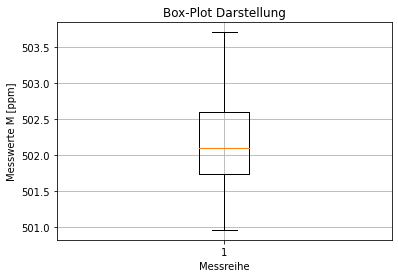

In [5]:
x = scipy.io.loadmat('Verunreinigungen.mat')['Verunreinigungen']
x = np.ravel(x)

fig = plt.figure(figsize =(6, 4))
plt.boxplot(x)
plt.title('Box-Plot Darstellung')
plt.xlabel('Messreihe')
plt.ylabel('Messwerte M [ppm]')
plt.grid()
plt.show()

06: Multiple BoxPlot

Text(0.5, 0.98, '')

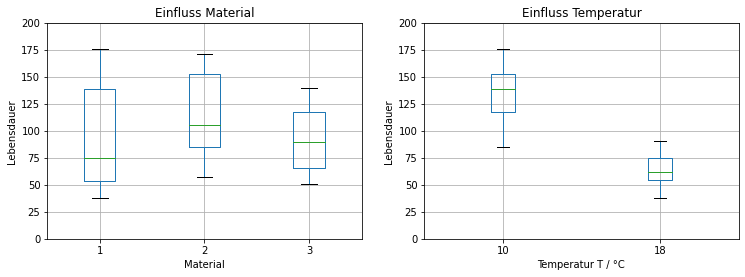

In [9]:
"""CSV file laden"""
csv = pd.read_csv('LebensdauerGeneratoren.csv', delimiter=';')

"""Dataframe erstellen"""
df = pd.DataFrame(csv, columns = ['temp', 'mat', 'dauer'])

"""Box-Plots erstellen"""
fig = plt.figure(1, figsize=(12, 4))
ax1, ax2 = fig.subplots(1, 2)
ax1 = df[['dauer', 'mat']].boxplot(by='mat', ax=ax1)
ax1.grid(True)
ax1.axis([0.5, 3.5, 0, 200])            #Grenzen anpassen!
ax1.set_xlabel('Material')
ax1.set_ylabel('Lebensdauer')
ax1.set_title('Einfluss Material')

ax2 = df[['dauer', 'temp']].boxplot(by='temp', ax=ax2)
ax2.grid(True)
ax2.axis([0.5, 2.5, 0, 200])            #Grenzen anpassen!
ax2.set_xlabel('Temperatur T / °C')
ax2.set_ylabel('Lebensdauer')
ax2.set_title('Einfluss Temperatur')

plt.suptitle('')

07: Kummulative Randhäufigkeit

Text(0.5, 1.0, 'Brechungsindex')

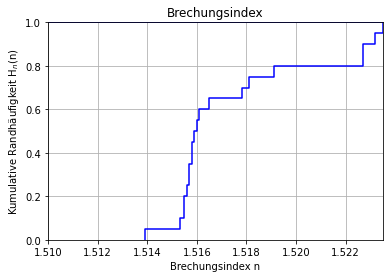

In [4]:
"""Gewollte Daten aus dem Matlab file laden"""
x = scipy.io.loadmat('Glasuntersuchung.mat')['values']

n_sort = np.append(np.sort(x[:,0]),0)   
HNN =np.append(0,np.cumsum(1/len(x[:,0])*np.ones(np.shape(x[:,0]))))

plt.step(n_sort,HNN, color='b')
plt.xlim(left=1.510, right=n_sort.max())
plt.ylim(top=1, bottom=0)
plt.grid('True')
plt.xlabel('Brechungsindex n')
plt.ylabel('Kumulative Randhäufigkeit H$_n$(n)')
plt.title('Brechungsindex')